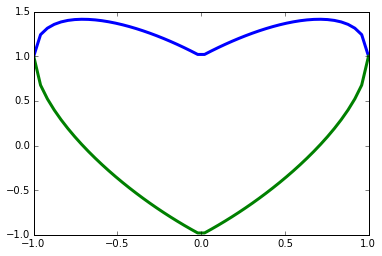

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x = np.linspace(-1,1,50)
y1 = np.sqrt(x * x) + np.sqrt(1 - x * x)
y2 = np.sqrt(x * x) - np.sqrt(1 - x * x)
plt.plot(x, y1, c='r', lw = 3)
plt.plot(x, y2, c='r', lw = 3)
plt.show()

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
%matplotlib inline

In [1]:
%load_ext version_information

In [3]:
%version_information numpy

Software versions
Python 3.4.3 64bit [GCC 4.9.2]
IPython 3.1.0
OS Linux 3.19.0 30 generic x86_64 with Ubuntu 15.04 vivid
numpy 1.10.0.post2
Sun Oct 11 17:15:32 2015 ART

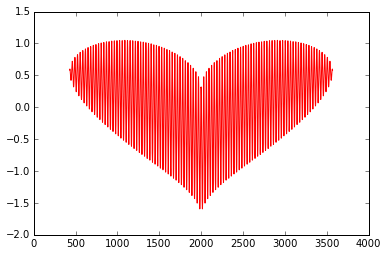

In [4]:
x=np.r_[-2:2:0.001]
y=(np.sqrt(np.cos(x))*np.cos(200*x)+np.sqrt(np.abs(x))-0.7)*np.power((4-x*x),0.01)
plt.plot(y, color='r')

In [5]:
def  heart_3d(x,y,z):
    return (x**2+(9/4)*y**2+z**2-1)**3-x**2*z**3-(9/80)*y**2*z**3

In [6]:
#!/usr/bin/env python
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

def plot_implicit(fn, bbox=(-1.5,1.5)):
    ''' create a plot of an implicit function
    fn  ...implicit function (plot where fn==0)
    bbox ..the x,y,and z limits of plotted interval'''
    xmin, xmax, ymin, ymax, zmin, zmax = bbox*3
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    A = np.linspace(xmin, xmax, 100) # resolution of the contour
    B = np.linspace(xmin, xmax, 40) # number of slices
    A1,A2 = np.meshgrid(A,A) # grid on which the contour is plotted

    for z in B: # plot contours in the XY plane
        X,Y = A1,A2
        Z = fn(X,Y,z)
        cset = ax.contour(X, Y, Z+z, [z], zdir='z',colors=('r',))
        # [z] defines the only level to plot for this contour for this value of z

    for y in B: # plot contours in the XZ plane
        X,Z = A1,A2
        Y = fn(X,y,Z)
        cset = ax.contour(X, Y+y, Z, [y], zdir='y',colors=('red',))

    for x in B: # plot contours in the YZ plane
        Y,Z = A1,A2
        X = fn(x,Y,Z)
        cset = ax.contour(X+x, Y, Z, [x], zdir='x',colors=('red',))

    # must set plot limits because the contour will likely extend
    # way beyond the displayed level.  Otherwise matplotlib extends the plot limits
    # to encompass all values in the contour.
    ax.set_zlim3d(zmin,zmax)
    ax.set_xlim3d(xmin,xmax)
    ax.set_ylim3d(ymin,ymax)

    plt.show()

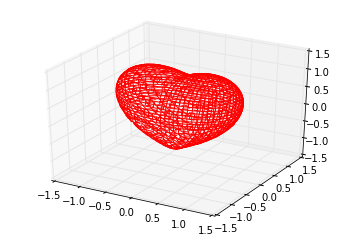

In [7]:
plot_implicit(heart_3d)

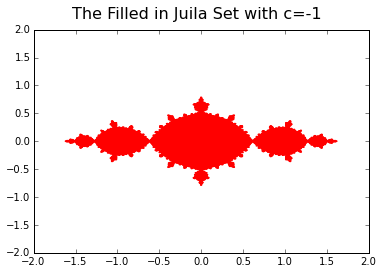

In [9]:
#Julia set plot
ax = plt.subplot(111)

########################################
## c parameter for plot : change this ##
########################################
c = np.complex(-1,0)
plt.suptitle('The Filled in Juila Set with c=-1', fontsize=16)
########################################

#########################################################
## Size of side grid for J_c plot: change for accuracy ##
#########################################################
grid = 500
#########################################################

#############################################################
## number of iterations we use to test for escape : change ##
#############################################################
escape = 2000
#############################################################

absc = np.abs(c)
rc = 0.5+np.sqrt(0.25+absc)

#####################################
## Region of plot: change for zoom ##
#####################################
xmin = -2.0
xmax = +2.0
ymin = -2.0
ymax = +2.0
#xmin = 0.0
#xmax = 1.0
#ymin = 0.0
#ymax = 1.0
#xmin = 0.5
#xmax = 0.7
#ymin = 0
#ymax = 0.2
#xmin = 0.6
#xmax = 0.65
#ymin = 0
#ymax = 0.05
#xmin = 0.618
#xmax = 0.619
#ymin = 0
#ymax = 0.001
######################################

x_range = np.arange(xmin, xmax, (xmax - xmin) / grid)
y_range = np.arange(ymin, ymax, (ymax - ymin) / grid)

plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
pointSize = (xmax- xmin)/grid

# Generate keep set points
for y in y_range:
    for x in x_range:
        z = np.complex(x, y)
        escapecount=0

        #  tests if z is in the keep set (i.e. filled in Julia Set)
        while np.abs(z) <= rc and escapecount < escape:
            z = z*z + c
            escapecount+=1
            
        # Write point to plot if we have tried to get out escape times and failed
        if escapecount == escape :
            keepSetPoint = plt.Circle((x,y), radius=pointSize, color='r')
            ax.add_patch(keepSetPoint)  
    
# Display the Plot
plt.show()

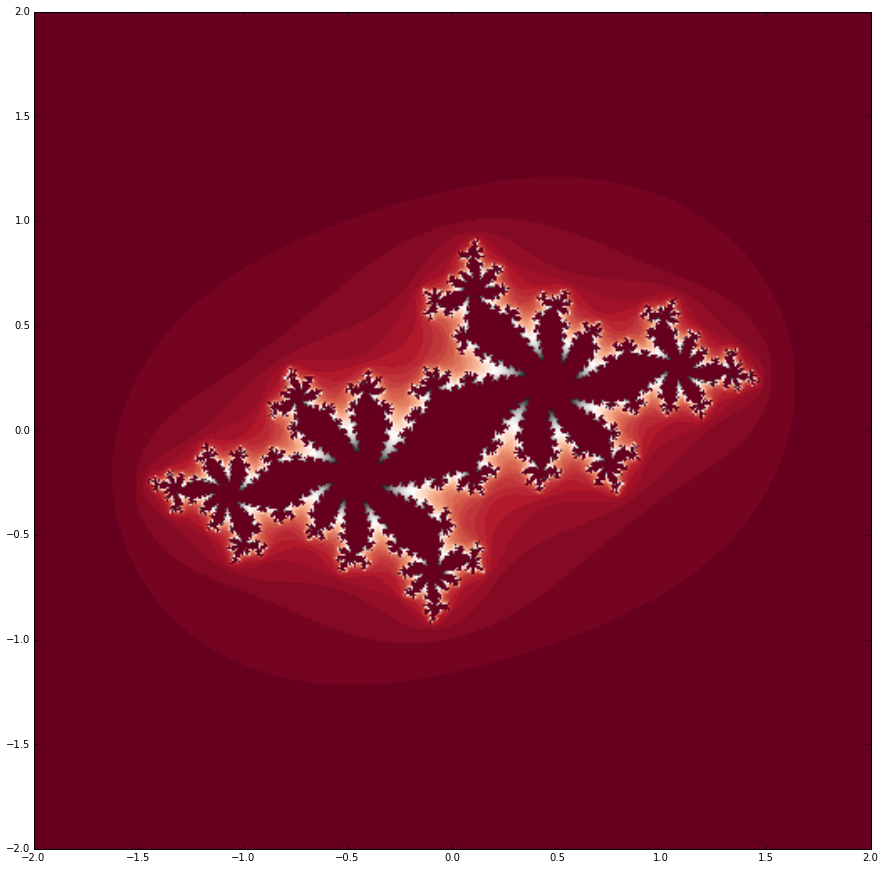

In [15]:
#Plot Julia sets
r_min, r_max = -2.0, 2.0
c_min, c_max = -2.0, 2.0

# Even intervals for points to compute orbits of
# CHANGED
r_range = np.arange(r_min, r_max, (r_max - r_min) / 500.0)
c_range = np.arange(c_min, c_max, (c_max - c_min) / 500.0)

c = complex(-0.624, 0.435)
xs = []
ys = []
# CHANGED
mat = np.zeros((len(c_range),len(r_range)))
colors = []

# CHANGED
matComp = 0 # Index of the new mat values
matReal = 0
for comp in c_range:
    for real in r_range:
        z = complex(real, comp)

        escaped = False
        for i in range(0, 50):
            z = z*z + c

            if abs(z) > max(abs(c), 2):
                escaped = True
                # CHANGED
                mat[matComp, matReal]=i

                # Colors correspond to escape speed
                if i < 7:
                    colors.append((1.0 - .055* i, 0.0, 0.0))

                if i >= 7 and i < 14:
                    colors.append((1.0 - .025*i, .6 - .025*i, 0))

                if i >= 14 and i < 21:
                    colors.append((1.0 - .0035*i, 1.0 - .0045*i, 0.0))

                if i >= 21 and i < 28:
                    colors.append((0.0, 1.0 - .0045*i, 0.0))

                if i >= 28 and i < 35:
                    colors.append((0.0, 0.0, 1.0 - .0055*i))

                if i >= 35 and i < 42:
                    colors.append((.435 - .0055*i, 0.0, 1.0 - .0055*i))    

                if i >= 42:
                    colors.append((0.62 - .005*i, 0, 1.0 - .005*i))
                break
        # CHANGED
        matReal += 1


        xs.append(real)
        ys.append(comp)

        # Points that don't escape are black
        if escaped == False:
            colors.append((0.0, 0.0, 0.0))
    # CHANGED
    matComp+=1
    matReal=0

#CHANGED
fig = plt.figure(figsize=(15,15))
plt.imshow(mat, cmap="RdGy", extent=[-2,2,-2,2])

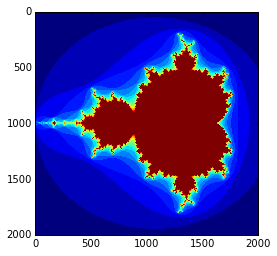

In [14]:
#Mandelbrot Set Example
def mandelbrot( h,w, maxit=20 ):
    '''Returns an image of the Mandelbrot fractal of size (h,w).'''
    y,x = np.ogrid[ -1.4:1.4:h*1j, -2:0.8:w*1j ]
    c = x+y*1j
    z = c
    divtime = maxit + np.zeros(z.shape, dtype=int)
    
    for i in range(maxit):
        z  = z**2 + c
        diverge = z*np.conj(z) > 2**2         # who is diverging
        div_now = diverge & (divtime==maxit)  # who is diverging now
        divtime[div_now] = i                  # note when
        z[diverge] = 2                        # avoid diverging too much
        
    return divtime

plt.imshow(mandelbrot(2000,2000))
plt.show()

In [15]:
#Fermat spiral
golden_angle = np.deg2rad(137.508)
c = 200.0
n_florets = 1000
floret_radius = 10.0

florets = np.arange(n_florets)
ratios = np.sqrt(florets) * c
thetas = florets * golden_angle

x = ratios * np.cos(thetas)
y = ratios * np.sin(thetas)

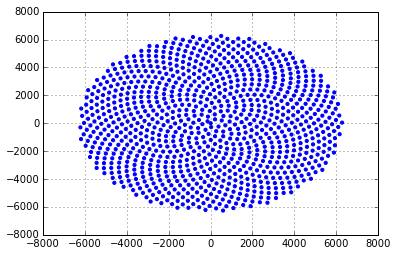

In [17]:
plt.scatter(x, y, s=[floret_radius]*n_florets, color='b')
plt.grid(True)

In [6]:
def py_julia_fractal(z_re, z_im, j):
    for m in range(len(z_re)):
        for n in range(len(z_im)):
            z = z_re[m] + 1j * z_im[n]
            for t in range(256):
                z = z ** 2 - 0.05 + 0.68j
                if np.abs(z) > 2.0:
                    j[m, n] = t
                    break

In [7]:
import numba

jit_julia_fractal = numba.jit(nopython=True)(py_julia_fractal)

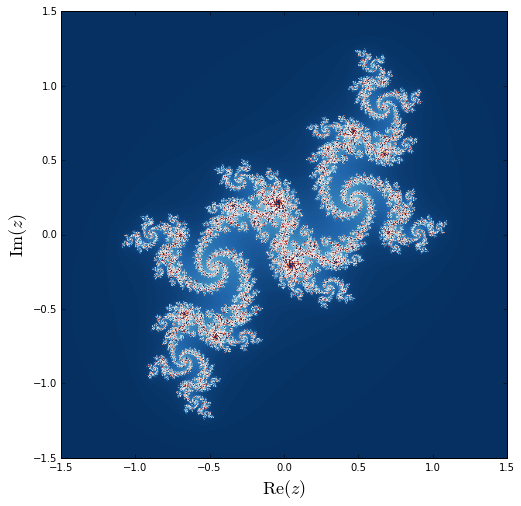

In [11]:
N = 1024
j = np.zeros((N, N), np.int64)
z_real = np.linspace(-1.5, 1.5, N)
z_imag = np.linspace(-1.5, 1.5, N)
jit_julia_fractal(z_real, z_imag, j)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(j, cmap=plt.cm.RdBu_r, extent=[-1.5, 1.5, -1.5, 1.5])
ax.set_xlabel("$\mathrm{Re}(z)$", fontsize=18)
ax.set_ylabel("$\mathrm{Im}(z)$", fontsize=18)